In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np


2021-08-23 17:31:08.091967: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/lib/x86_64-linux-gnu
2021-08-23 17:31:08.092001: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def load_data():
    data_folder = '/home/fra/DataMart/datacentre/opendata/time_series/airline-passengers.csv'
    # load the dataset
    dataframe = pandas.read_csv(data_folder, usecols=[1], engine='python')
    dataset = dataframe.values
    dataset = dataset.astype('float32')
    return dataset

def transform(dataset):

    # split into train and test sets
    train_size = int(len(dataset) * 0.67)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

    # normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    train = scaler.fit_transform(train)
    test = scaler.transform(test)

    return (train, test, scaler)

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    # Y has a delayed by look_back steps
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [3]:
def get_train_test_data(look_back):
    df = load_data()
    train_df, test_df, scaler = transform(df)
    x_train, y_train = create_dataset(train_df, look_back)
    x_test, y_test = create_dataset(test_df, look_back)
    return (x_train, x_test, y_train, y_test, scaler)

In [4]:
look_back = 1

(x_train, x_test, y_train, y_test, scaler) =  get_train_test_data(look_back)

In [5]:
x_train.shape, x_test.shape, y_train.shape

((94, 1), (46, 1), (94,))

In [6]:
# x is a delayed vector of y

In [7]:
x_train[:10]

array([[0.02588999],
       [0.04530746],
       [0.09061491],
       [0.08090615],
       [0.05501619],
       [0.10032365],
       [0.14239484],
       [0.14239484],
       [0.10355988],
       [0.04854369]], dtype=float32)

In [8]:
y_train[:10]

array([0.04530746, 0.09061491, 0.08090615, 0.05501619, 0.10032365,
       0.14239484, 0.14239484, 0.10355988, 0.04854369, 0.        ],
      dtype=float32)

In [9]:
def reshape_data(df):
    # reshape input to be [samples, time steps, features]
    return numpy.reshape(df, (df.shape[0], 1, df.shape[1]))

### modeling

In [10]:
def build_model(look_back):
    model = Sequential()
    # input_shape = (batch size, time_steps, num_features)
    model.add(LSTM(4))
    # model.add(LSTM(4, input_shape=(None, look_back)))
    # model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    return model

In [11]:
trainX = reshape_data(x_train)
testX = reshape_data(x_test)

In [12]:
model = build_model(look_back) 
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, y_train, epochs=100, batch_size=1, verbose=1)

2021-08-23 17:31:11.144110: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-08-23 17:31:11.147555: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-23 17:31:11.148023: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GT 540M computeCapability: 2.1
coreClock: 1.344GHz coreCount: 2 deviceMemorySize: 1.94GiB deviceMemoryBandwidth: 26.82GiB/s
2021-08-23 17:31:11.148141: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/lib/x86_64-linux-gnu
2021-08-23 17:31:11.148246: W tensorflow/stream_executor/platform/default/dso_loader.

Epoch 1/100
94/94 [==============================] - 2s 2ms/step - loss: 0.1681
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.1012
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0668
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0506
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0437
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0396
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0365
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0334
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0305
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0278
Epoch 11/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0250
Epoch 12/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 13/100
94/94 [=================

### Evaluate

In [70]:
pred = model.predict(testX)

# un-normalize time series
test_pred = scaler.inverse_transform(pred)
test_actual = scaler.inverse_transform(y_test[:, np.newaxis])

# calculate root mean squared error
testScore = math.sqrt(mean_squared_error(test_actual, test_pred))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 65.42 RMSE


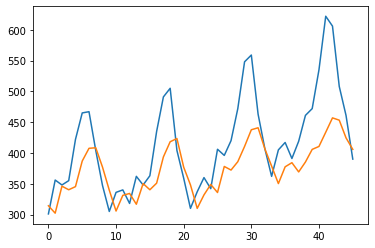

In [71]:
plt.plot(test_actual)
plt.plot(test_pred)

In [72]:
pred = model.predict(trainX)

train_pred = scaler.inverse_transform(pred)
train_actual = scaler.inverse_transform(y_train[:, np.newaxis])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(train_actual, train_pred))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 22.62 RMSE


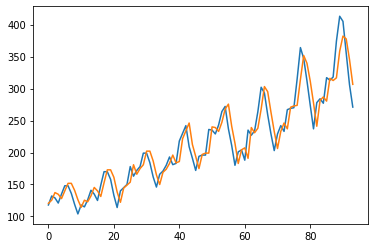

In [73]:
plt.plot(train_actual)
plt.plot(train_pred)

### Join together

In [74]:
actual.shape, train_actual.shape

((46, 1), (94, 1))

In [83]:
all_actual = np.concatenate([train_actual, test_actual])
all_pred = np.concatenate([train_pred, test_pred])

In [84]:
train_actual.shape, actual.shape

((94, 1), (46, 1))

In [85]:
train_pred.shape, pred.shape

((94, 1), (94, 1))

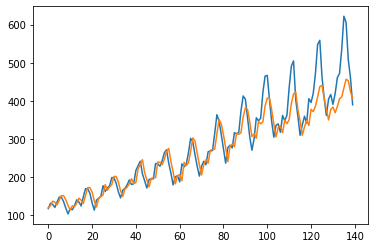

In [86]:
plt.plot(all_actual)
plt.plot(all_pred)